# 1. Load Models & Data

In [1]:
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt
from joblib import load

c:\Users\Admin\OneDrive\ACADEMIA\10 Academy\Week 8 & 9\GitHub Repository\FraudSight-AI\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load best models
model_rf = load("../data/models/random_forest_model.pkl")
model_logreg = load("../data/models/logistic_regression_model.pkl")

# Load processed test data
X_test_creditcard = pd.read_csv("../data/processed/creditcard_test_ready.csv")
X_test_fraud = pd.read_csv("../data/processed/test_ready.csv")

# For tree explainer, limit sample size for speed
X_explain_creditcard = X_test_creditcard.sample(100, random_state=42)
X_explain_fraud = X_test_fraud.sample(100, random_state=42)

# Drop label columns if present (handle both 'Class' and 'class')
for df in [X_explain_creditcard, X_explain_fraud]:
    for col in ['Class', 'class']:
        if col in df.columns:
            df.drop(columns=[col], inplace=True)

print("✅ Data and models loaded")

✅ Data and models loaded


# 2. Credit Card - Random Forest

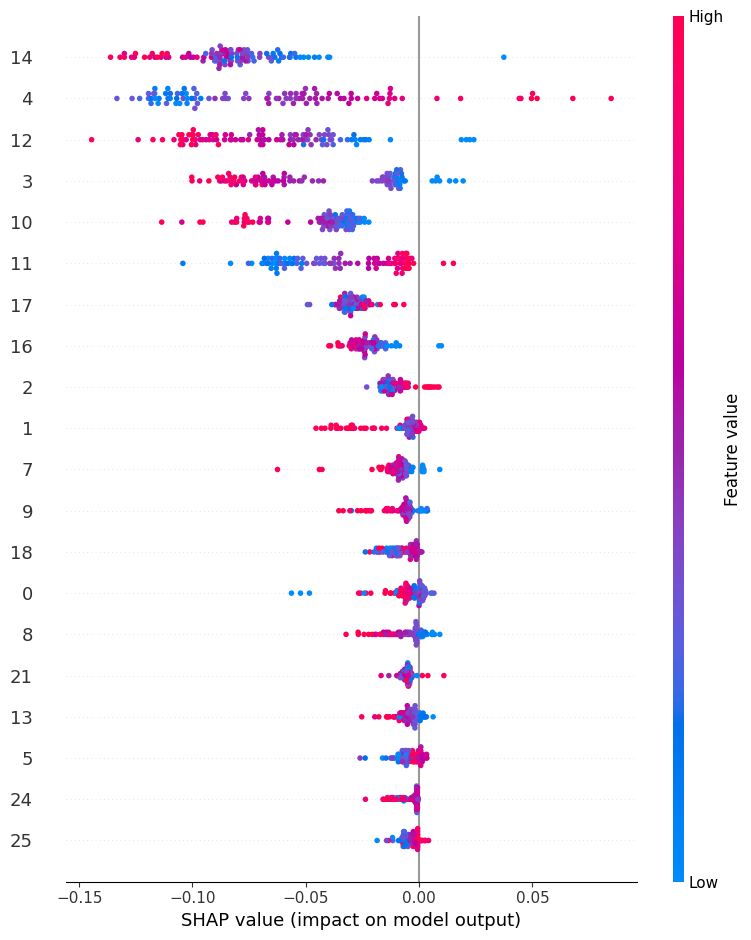

✅ Credit Card Random Forest SHAP plots saved


<Figure size 640x480 with 0 Axes>

In [3]:
# TreeExplainer for Random Forest

explainer_rf = shap.TreeExplainer(model_rf)
shap_values_rf = explainer_rf.shap_values(X_explain_creditcard)

# ✅ Global SHAP Summary Plot
shap.summary_plot(shap_values_rf[:, :, 1], X_explain_creditcard)
plt.savefig('../reports/SHARP_plots/creditcard_rf_shap_summary.png')

# 2️⃣ Local Force Plot
shap.initjs()
force_plot_rf = shap.force_plot(
    explainer_rf.expected_value[1],
    shap_values_rf[0, :, 1],
    X_explain_creditcard.iloc[0]
)
shap.save_html('../reports/SHARP_plots/creditcard_rf_force_plot.html', force_plot_rf)

print("✅ Credit Card Random Forest SHAP plots saved")


# 3. Fraud Data - Logistic Regression

In [4]:
X_explain_fraud = X_explain_fraud.drop(columns=['class'], errors='ignore')

C:\Users\Admin\AppData\Local\Temp\ipykernel_10516\3346458983.py:7: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values_logreg, X_explain_fraud)


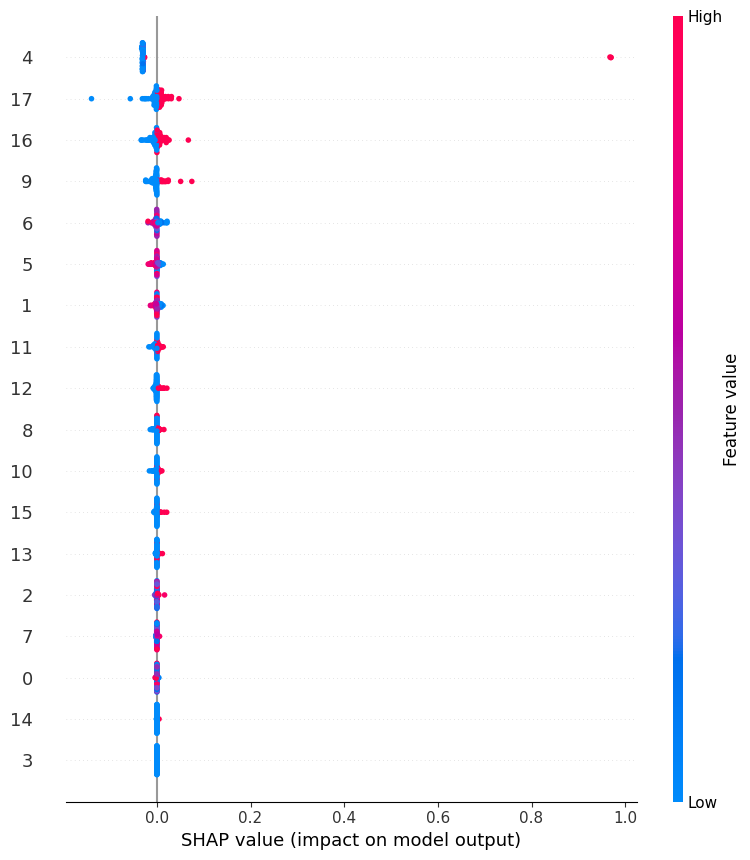

✅ Fraud Data Logistic Regression SHAP plots saved
All SHAP explainability plots done!


<Figure size 640x480 with 0 Axes>

In [5]:
# PermutationExplainer for Logistic Regression
# Fix: Use model_logreg.predict instead of model_logreg directly, as SHAP expects a callable
explainer_logreg = shap.Explainer(model_logreg.predict, X_explain_fraud, algorithm="permutation")
shap_values_logreg = explainer_logreg(X_explain_fraud)

# ✅ Global SHAP Summary Plot
shap.summary_plot(shap_values_logreg, X_explain_fraud)
plt.savefig('../reports/SHARP_plots/fraud_logreg_shap_summary.png')

# ✅ Local SHAP Force Plot
force_plot_logreg = shap.force_plot(
    shap_values_logreg[0].base_values,
    shap_values_logreg[0].values,
    X_explain_fraud.iloc[0]
)
shap.save_html('../reports/SHARP_plots/fraud_logreg_force_plot.html', force_plot_logreg)
print("✅ Fraud Data Logistic Regression SHAP plots saved")

print("All SHAP explainability plots done!")
